In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

In [2]:
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [3]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
base = base.drop(['Unnamed: 0'], axis=1)
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

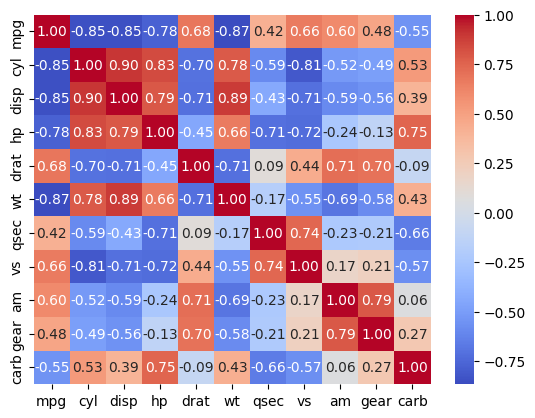

In [5]:
corr = base.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

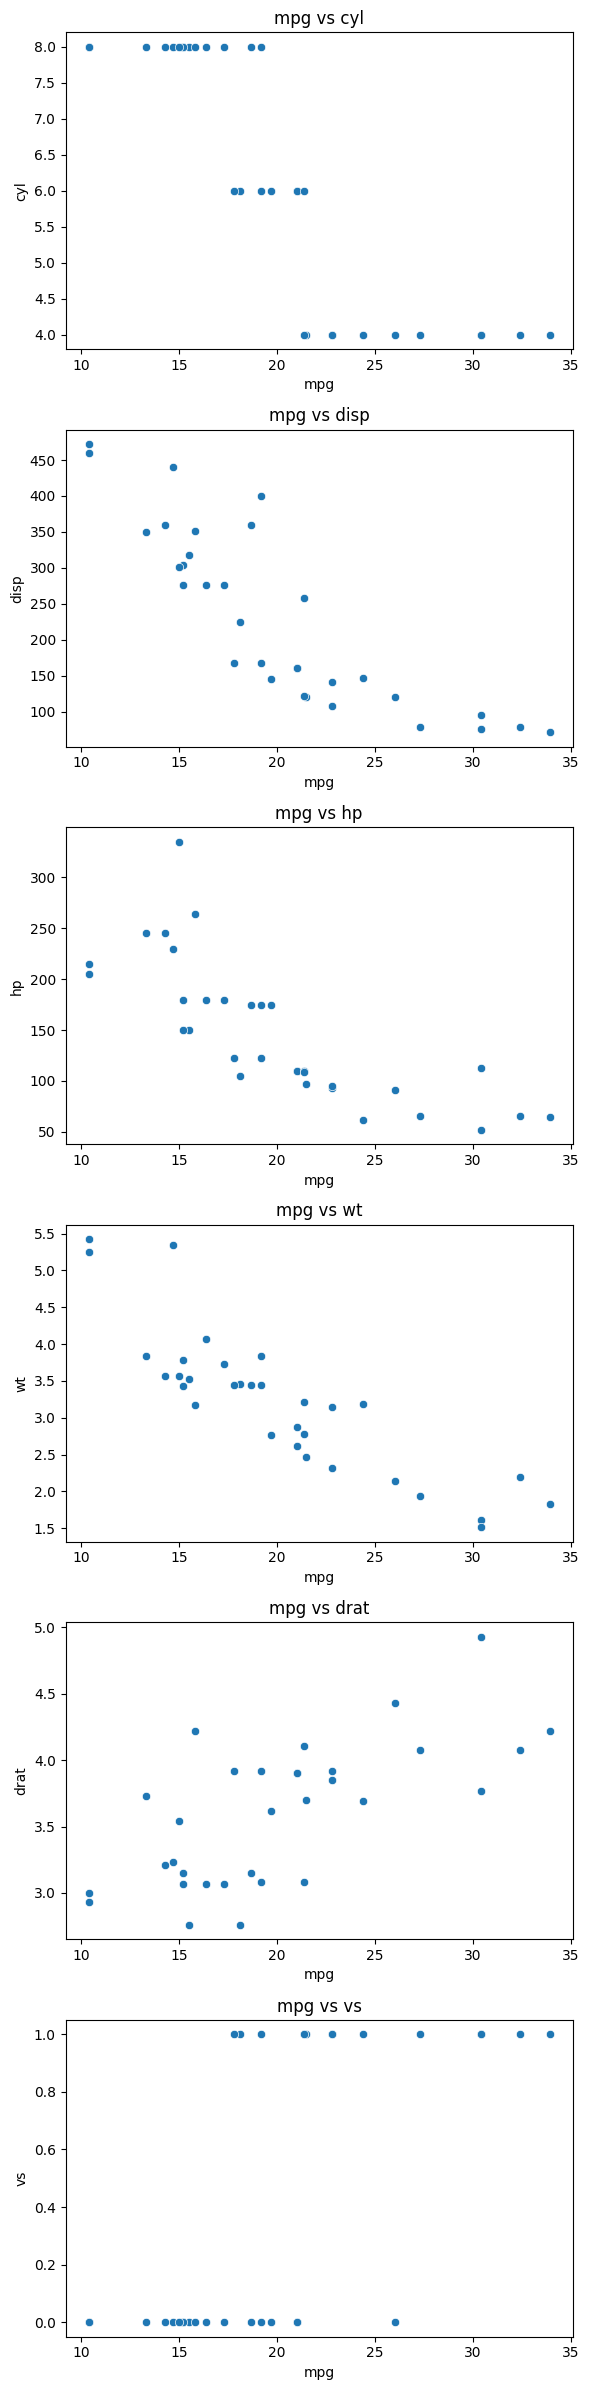

In [7]:
column_pairs = [('mpg', 'cyl'), ('mpg', 'disp'), ('mpg', 'hp'), ('mpg', 'wt'), ('mpg', 'drat'), ('mpg', 'vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize = (6,4 * n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [9]:
# aic 156.6 bic 162.5
modelo = sm.ols(formula="mpg ~ wt + disp + hp", data=base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           8.65e-11
Time:                        15:14:05   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

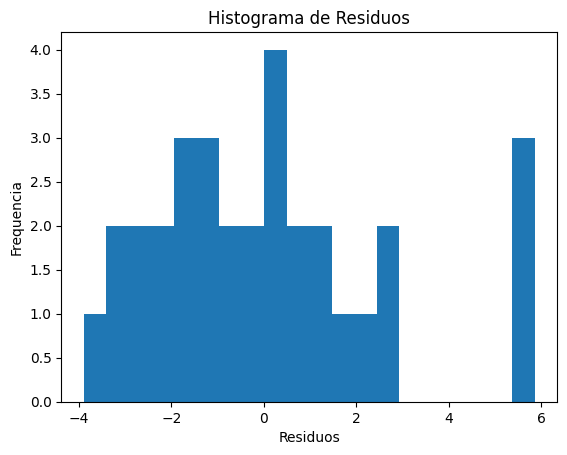

In [10]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frequencia')
plt.title('Histograma de Residuos')
plt.show()

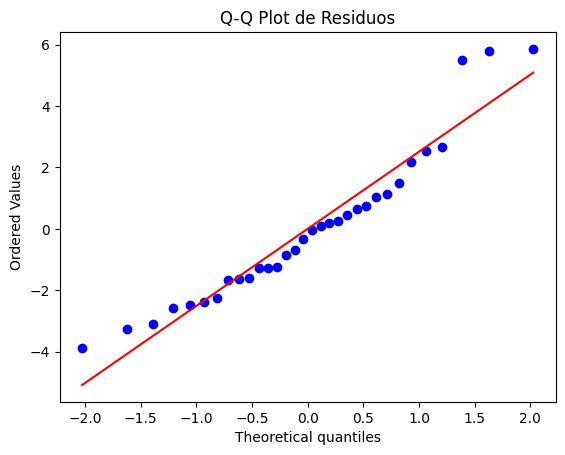

In [11]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.show()

In [12]:
# h0 - dadis estao normalmente distribuidos
# p <= 0.05 rejeito a hipotese nula, (nao estao normalmente distribuidos)
# p>0.05  nao é possivel rejeitar a h0
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk statistic: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk statistic: 0.927, p-value: 0.033


In [13]:
# aic 165.1 bic 169.5
modelo = sm.ols(formula="mpg ~ disp + cyl", data=base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.06e-09
Time:                        15:49:42   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

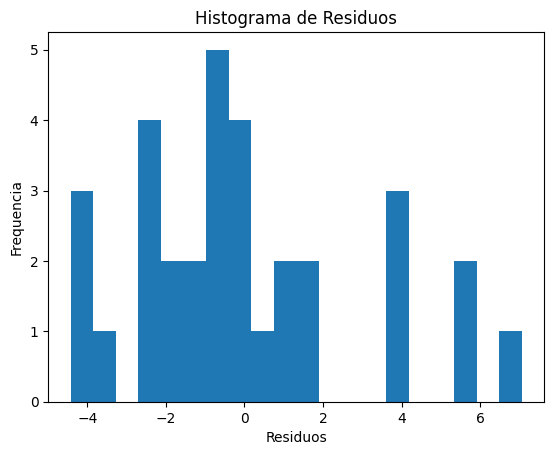

In [14]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frequencia')
plt.title('Histograma de Residuos')
plt.show()

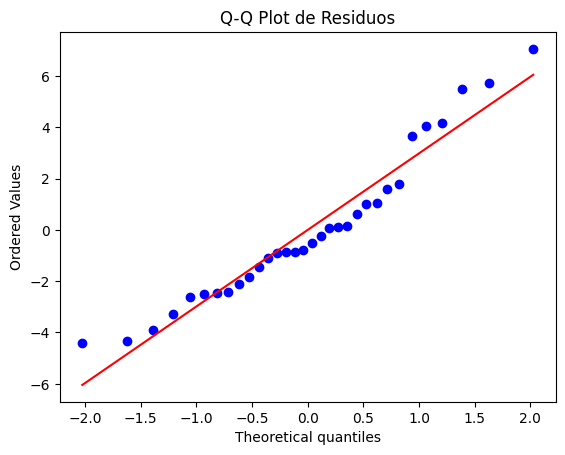

In [15]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.show()

In [16]:
# h0 - dadis estao normalmente distribuidos
# p <= 0.05 rejeito a hipotese nula, (nao estao normalmente distribuidos)
# p>0.05  nao é possivel rejeitar a h0
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk statistic: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk statistic: 0.942, p-value: 0.085


In [17]:
# aic 179.1 bic 183.5
modelo = sm.ols(formula="mpg ~ drat + vs", data=base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           5.82e-07
Time:                        15:52:02   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

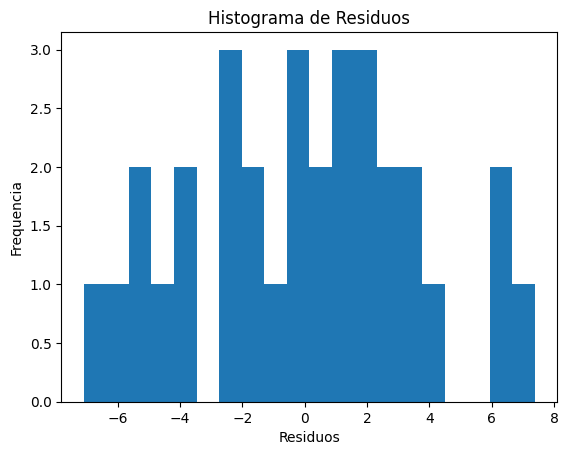

In [18]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frequencia')
plt.title('Histograma de Residuos')
plt.show()

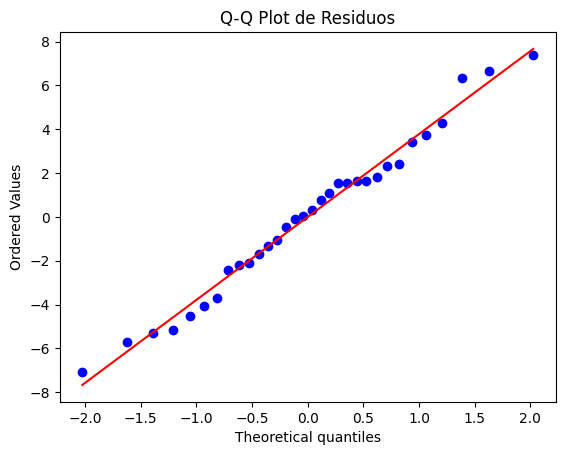

In [19]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.show()

In [20]:
# h0 - dadis estao normalmente distribuidos
# p <= 0.05 rejeito a hipotese nula, (nao estao normalmente distribuidos)
# p>0.05  nao é possivel rejeitar a h0
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk statistic: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk statistic: 0.981, p-value: 0.822
